In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from scipy import signal


In [23]:
def median_filter(sig,  t, dt, clean=None, plot=True):
    """
    Median filter for removing noise from signal
    :param sig: signal
    :param clean: clean signal
    :return: filtered signal
    """
    filtered = signal.medfilt(sig, 11)

    if plot:
        fig, ax = plt.subplots(3, 1)
        fig.tight_layout(pad=1.5)
        ax[0].plot(t, sig, color='r', label='noisy signal')
        ax[0].set_xlim(t[0], t[-1])
        if clean is not None:
            ax[0].plot(t, clean, color='b', label='clean signal')
        ax[0].legend()
        ax[0].set_title('Signal')

        ax[1].plot(t, filtered, color='g', label='filtered signal')
        ax[1].set_xlim(t[0], t[-1])
        if clean is not None:
            ax[1].plot(t, clean, color='b', label='clean signal')
        ax[1].legend()
        ax[1].set_title('Filtered signal')

        ax[2].plot(t, sig, color='r', alpha=0.5, label='noisy signal')
        ax[2].plot(t, filtered, color='g', label='filtered signal')
        ax[2].set_xlim(t[0], t[-1])
        ax[2].legend()
        ax[2].set_title('Comparison')

        plt.show()
    return filtered


In [24]:
def fft_singal(sig, t, dt, clean=None, plot=True, threshold=None):
    """
    FFT for removing noise from signal
    :param sig: signal
    :param clean: clean signal
    :return: filtered signal
    """
    n = len(sig)

    # Compute the Fast Fourier Transform (FFT)
    fhat = np.fft.fft(sig, n)

    # PSD is the power spectral density
    PSD = fhat * np.conj(fhat) / n
    # print(PSD)

    # Use the PSD to filter out noise
    freq = (1/(dt*n)) * np.arange(n)
    
    # Only need the first half of the frequencies because of symmetry

    L = np.arange(1, np.floor(n/2), dtype='int')

    if plot:
        fig, ax = plt.subplots(2, 1)
        fig.tight_layout(pad=1.5)
        # Plot the noisy and clean signals
        ax[0].plot(t, sig, label='noisy', color='red')
        if clean is not None:
            ax[0].plot(t, clean, label='clean', color='green')
        ax[0].set_xlim(t[0], t[-1])
        ax[0].legend()
        ax[0].set_title('Signal')

        # Plot the Power Spectral Density (PSD)
        ax[1].plot(freq[L], PSD[L], label='PSD', color='blue')
        ax[1].set_xlim(freq[L[0]], freq[L[-1]])
        ax[1].legend()
        ax[1].set_title('Power Spectral Density')

        plt.show()

    if threshold is None:
        # find the optimum threshold, it should be about mean + 3*std of the PSD values (determined empirically) 3std = 99.7% of the data is below the threshold 
        psd_real  = np.abs(PSD[L])
        psd_mean = np.mean(psd_real)
        psd_std = np.std(psd_real)
    
        threshold = psd_mean + 3*psd_std

    # identify the indices where the PSD is too low
    indices = PSD > threshold
    PSDclean = PSD * indices
    fhat = indices * fhat

    # take the Inverse Fourier Transform
    ffilt = np.fft.ifft(fhat)

    # Plot the filtered signal
    

    if plot:
        fig, ax = plt.subplots(3, 1)
        fig.tight_layout(pad=1.5)
        # plt.sca(ax[0])
        ax[0].plot(t, sig, label='noisy', color='red')
        if clean is not None:
            ax[0].plot(t, clean, label='clean', color='green')
        # plt.plot(t, ffilt, label='filtered', color='blue')
        ax[0].set_xlim(t[0], t[-1])
        ax[0].legend()
        ax[0].set_title('Signal')


        # plt.sca(ax[1])
        ax[1].plot(freq[L], PSD[L], label='PSD', color='red')
        ax[1].plot(freq[L], PSDclean[L], label='PSDclean', color='blue', alpha=0.5)
        # draw a doted line at 100
        ax[1].plot(freq[L], threshold*np.ones(len(L)), label='treshold',
                color='orange', linestyle='--')
        ax[1].set_xlim(freq[L[0]], freq[L[-1]])
        ax[1].legend()
        ax[1].set_title('Power Spectral Density')

        plt.sca(ax[2])
        ax[2].plot(t, ffilt, label='filtered', color='blue')
        ax[2].plot(t, sig, label='noisy', color='red', alpha=0.5)
        
        ax[2].set_xlim(t[0], t[-1])
        ax[2].legend()
        ax[2].set_title('Filtered Signal')

        plt.show()

    return ffilt

    

Złożenie dwóch sinusów i ich filtracja

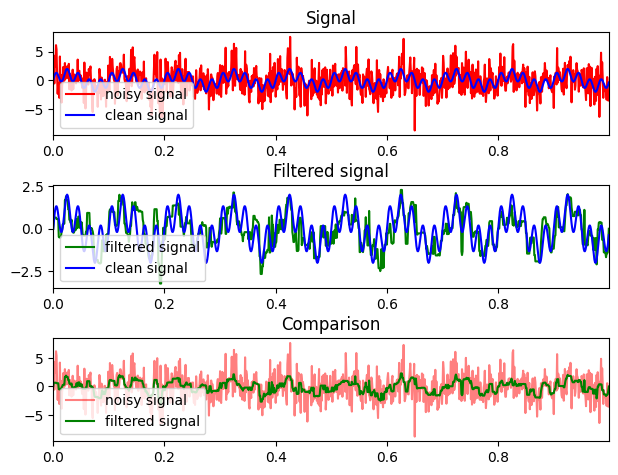

In [25]:
dt = 0.001
t = np.arange(0, 1, dt)

sinus = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*50*t)

noise = 2 * np.random.randn(len(t))

clean_sin = sinus.copy()
sinus += noise

filtered_1_median = median_filter(sinus, t, dt, clean=clean_sin)




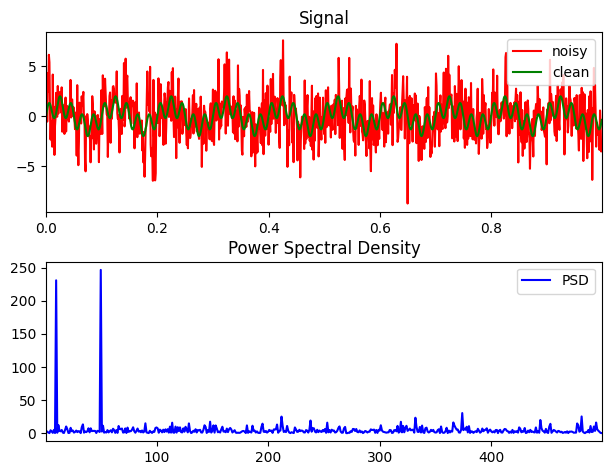

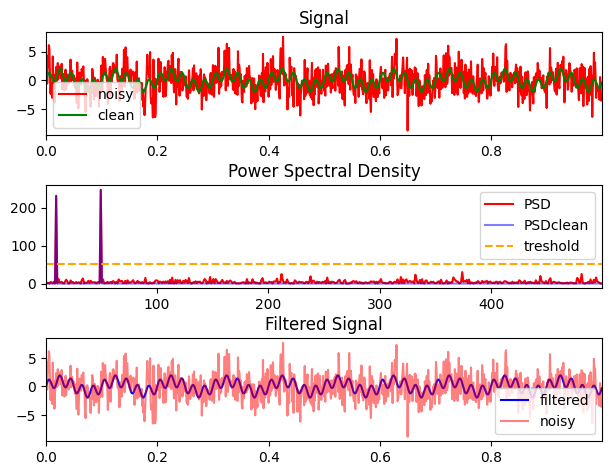

In [26]:
# filteret_sin_2 = fft_singal(sinus, t, dt, clean=clean_sin, threshold=100)
filteret_sin_2 = fft_singal(sinus, t, dt, clean=clean_sin)


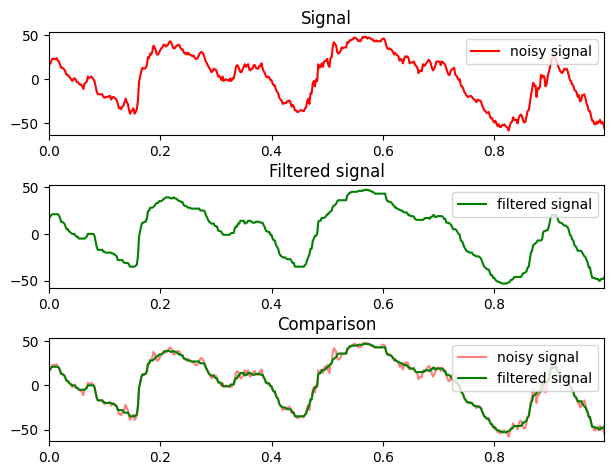

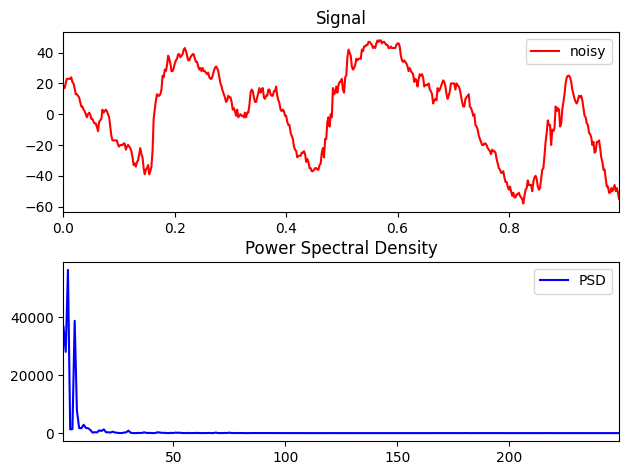

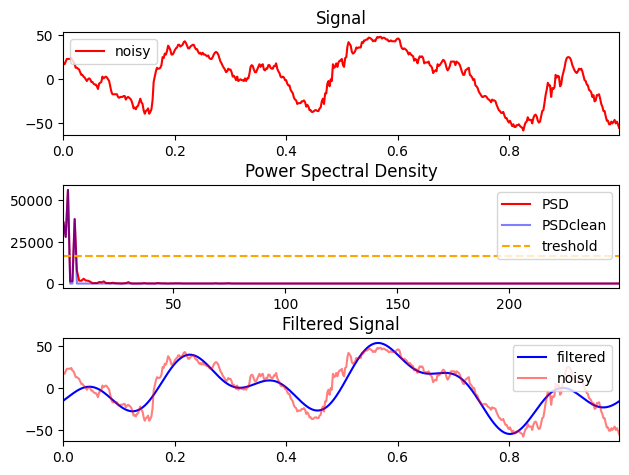

In [27]:
# load data from csv file
data = np.loadtxt('Dane/szum1_1_500.csv', delimiter=',')
# t = 500
dt = 0.002
t = np.arange(0, 1, dt)

filtered_median_1 = median_filter(data, t, dt)
# filteret_sin_2 = fft_singal(data, t, dt, threshold=20000)
filteret_fft_1 = fft_singal(data, t, dt)

# save data to csv file
np.savetxt('Dane/szum1_1_500_filtered_fft.csv', filteret_fft_1, delimiter=',')
np.savetxt('Dane/szum1_1_500_filtered_median.csv', filtered_median_1, delimiter=',')

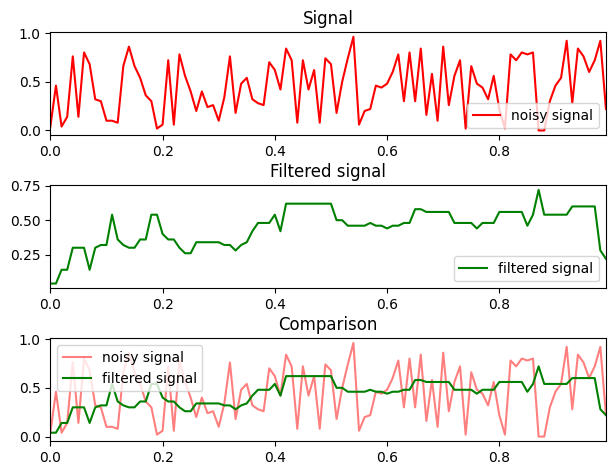

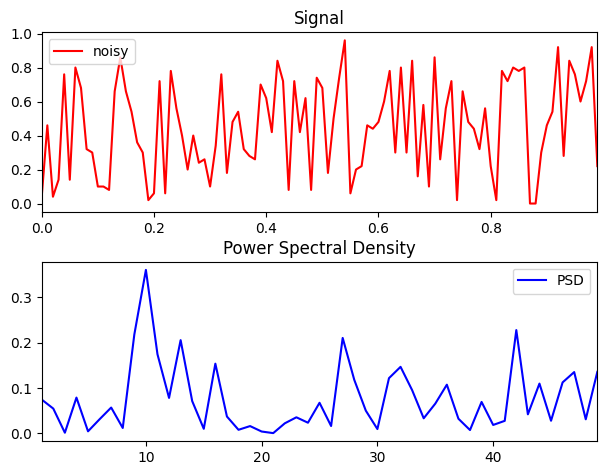

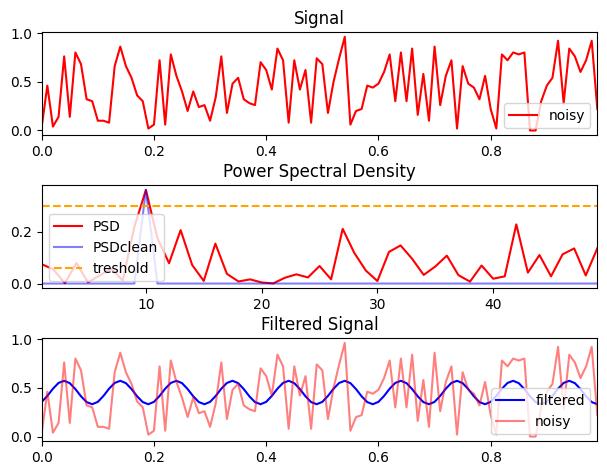

In [28]:
# load data from csv file
data = np.loadtxt('Dane/szum2_1_100.csv', delimiter=',')
# t = 100
dt = 0.01
t = np.arange(0, 1, dt)

filtered_median_2 = median_filter(data, t, dt)
filteret_fft_2 = fft_singal(data, t, dt)
# filteret_sin_2 = fft_singal(data, t, dt, threshold=0.25)

# save data to csv file
np.savetxt('Dane/szum2_1_100_filtered_fft.csv', filteret_fft_2, delimiter=',')
np.savetxt('Dane/szum2_1_100_filtered_median.csv', filtered_median_2, delimiter=',')

In [29]:
def process_new_signal(filename, dt, duration=1):
    """
    Process new signal from file and save it to csv file
    :param filename: name of file with signal
    :param dt: sampling time
    :param duration: duration of signal
    :return: None
    """
    # load data from csv file
    data = np.loadtxt(filename, delimiter=',')

    t = np.arange(0, duration, dt)

    # check if data is 1D, if not take first column
    if len(data.shape) > 1:
        data = data[:, 0]

    filtered_median = median_filter(data, t, dt)
    filteret_fft = fft_singal(data, t, dt)
    # save data to csv file
    np.savetxt(filename[:-4] + '_filtered_fft.csv', filteret_fft, delimiter=',')
    np.savetxt(filename[:-4] + '_filtered_median.csv', filtered_median, delimiter=',')

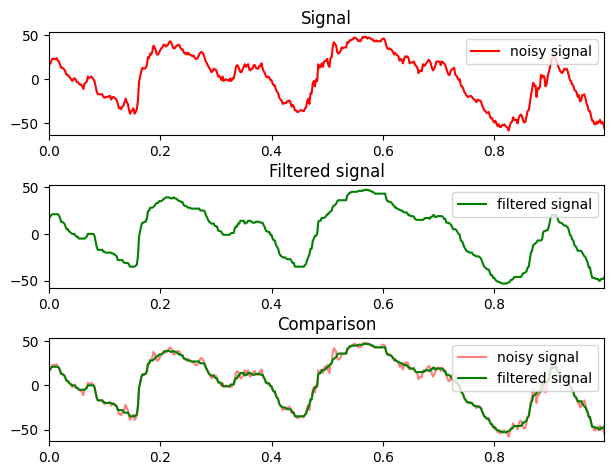

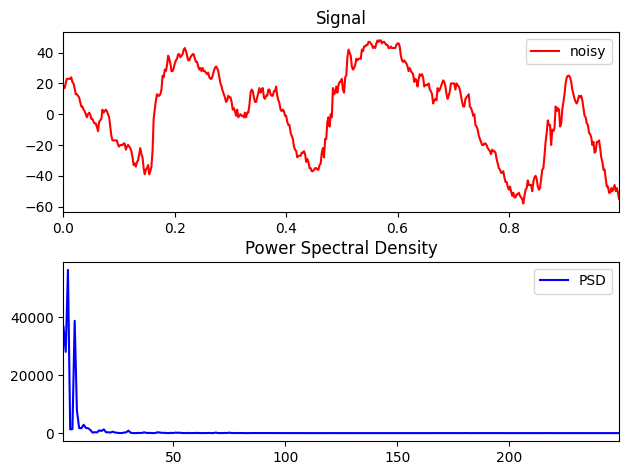

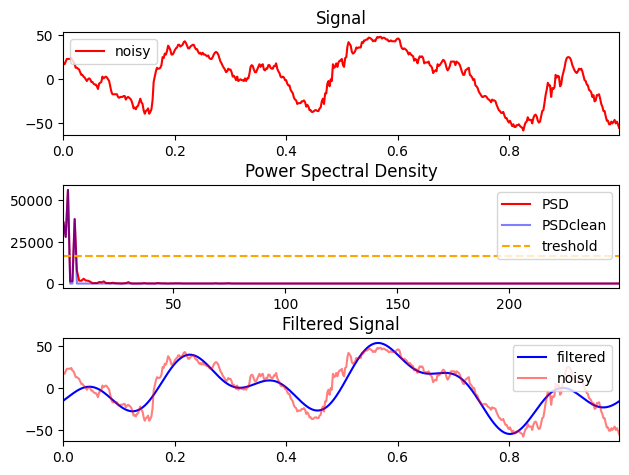

In [30]:
# sample usage for processing new signal
process_new_signal('Dane/szum1_1_500.csv', 0.002)